<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b> Svetlana's comment 3 </b>


Thank you for the updates! You can find my new comment with digit 3. You did a great job here! You learned how to build and evaluate models to predict used car prices. You have successfully conducted EDA, handled missing values and outliers. You trained and tuned several models, compared their RMSE and speed, and chose the best model for the final testing. You learned how to prepare and encode large data and how to weigh training speed vs. prediction error, and why this matters in real-world applications. I hope you enjoyed this project! I do not have any questions, so the project can be accepted. 




Good luck! 

    
</div>

<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b> Reviewer's comment 2 </b>
    

Thank you for submitting the project! I appreciate the time you took to update it!  I've left a couple of new comments titled as **Reviewer's comment 2**. Would you please take a look? 

    
</div>

<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b>   Svetlana's comment  </b>
      
Hi Collin, my name is Svetlana (https://hub.tripleten.com/u/6dee602c). Congratulations on submitting another project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 10px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared 2 subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
  
    
- Excluded irrelevant columns to reduce computational cost;
    
    
- Encoded cetegorical columns;    

    
- Trained and compared several models, great!


    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,


    
- Check the data for the duplicates after you drop columns. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same;



- Please explore distributions. Are there any outliers?


- We have too many gaps to drop them. Instead, consider replacing them with some unique value, such as "Unknown". It is normal that sometimes sellers do not specify some information. The model should "know" about such cases. 


    
- According to the task, we are supposed to measure models' training and prediction speed. Would you please measure them separately for each model?


There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Some notes:

Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.

<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import time
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/car_data.csv')
print(data.head(10))
print()
print(data.info())

        DateCrawled  Price  VehicleType  RegistrationYear Gearbox  Power  \
0  24/03/2016 11:52    480          NaN              1993  manual      0   
1  24/03/2016 10:58  18300        coupe              2011  manual    190   
2  14/03/2016 12:52   9800          suv              2004    auto    163   
3  17/03/2016 16:54   1500        small              2001  manual     75   
4  31/03/2016 17:25   3600        small              2008  manual     69   
5  04/04/2016 17:36    650        sedan              1995  manual    102   
6  01/04/2016 20:48   2200  convertible              2004  manual    109   
7  21/03/2016 18:54      0        sedan              1980  manual     50   
8  04/04/2016 23:42  14500          bus              2014  manual    125   
9  17/03/2016 10:53    999        small              1998  manual    101   

     Model  Mileage  RegistrationMonth  FuelType       Brand NotRepaired  \
0     golf   150000                  0    petrol  volkswagen         NaN   
1      NaN 

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment  </b>
    

Consider using `display` instead of `print` with dataframes :) The output will look better.



</div>

**First Observations**

- Some columns are not necessary for model training so we will remove them from our training set
- Some rows include missing data, so we will remove them. We are still left with over 200,000 rows of data to use, so it is not a problem.
- Because we are including columns with categorical data, we will need to use encoding to turn these into numerical columns.

In [3]:
# Removal of unnecessary columns that don't apply directly to the vehicle itself

irrelevant_columns = ['DateCrawled', 'RegistrationMonth', 'DateCreated', 'PostalCode', 'LastSeen', 'NumberOfPictures']

data = data.drop(irrelevant_columns, axis=1)
print(data.info())
print()
print(data.duplicated().sum())
print(data[data.duplicated()])
data = data.drop_duplicates()
print(data.duplicated().sum())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       316879 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           334536 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             334664 non-null  object
 6   Mileage           354369 non-null  int64 
 7   FuelType          321474 non-null  object
 8   Brand             354369 non-null  object
 9   NotRepaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB
None

45040
        Price VehicleType  RegistrationYear Gearbox  Power     Model  Mileage  \
1117      950       small              1999  manual     60      polo   150000   
1396        0         NaN              2000     NaN      0       NaN   150000   
2169        0      

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Agreed! We don't need these columns. 
    
</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
   
</div>

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Student's comment </b>
    
Fixed! 

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Great! 

</div>

In [4]:
#Drop rows with missing data

data.fillna('Unknown', inplace=True)
print(data.info())
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309329 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             309329 non-null  int64 
 1   VehicleType       309329 non-null  object
 2   RegistrationYear  309329 non-null  int64 
 3   Gearbox           309329 non-null  object
 4   Power             309329 non-null  int64 
 5   Model             309329 non-null  object
 6   Mileage           309329 non-null  int64 
 7   FuelType          309329 non-null  object
 8   Brand             309329 non-null  object
 9   NotRepaired       309329 non-null  object
dtypes: int64(4), object(6)
memory usage: 26.0+ MB
None

               Price  RegistrationYear          Power        Mileage
count  309329.000000     309329.000000  309329.000000  309329.000000
mean     4486.937196       2004.360105     110.976908  127217.735809
std      4564.852796         92.541399     200.969473   38532

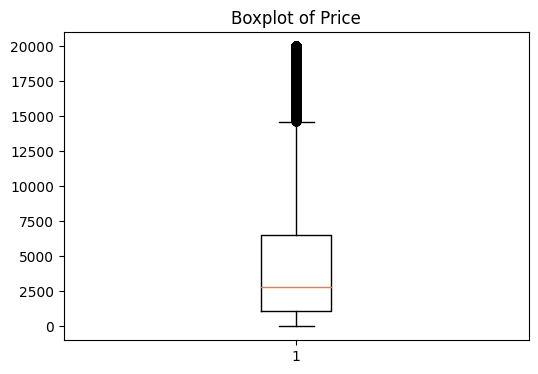

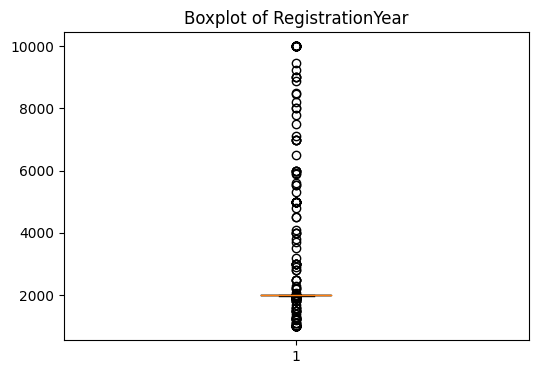

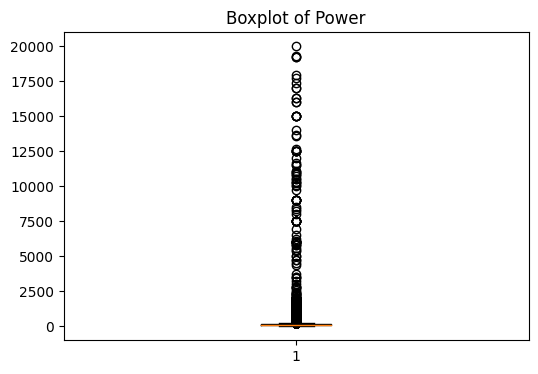

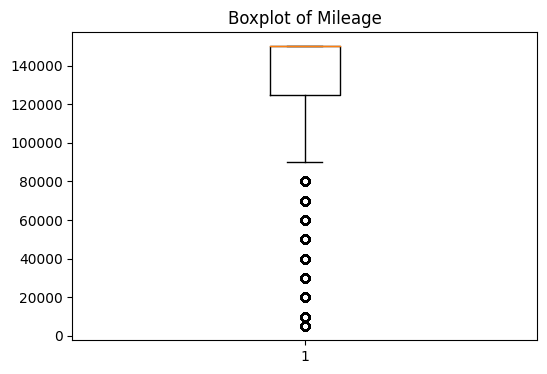

In [5]:

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = list(numeric_cols)

# Create boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()




In [6]:
def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data = drop_outliers_iqr(data, 'Price')
data = drop_outliers_iqr(data, 'RegistrationYear')
data = drop_outliers_iqr(data, 'Power')

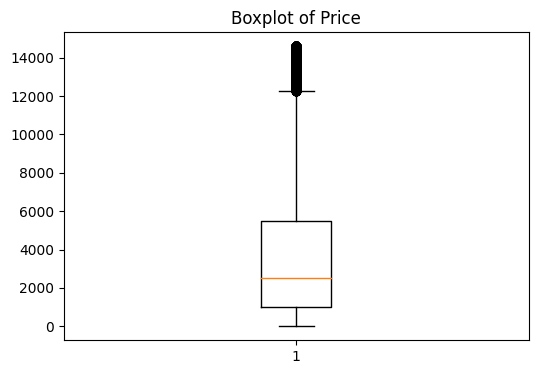

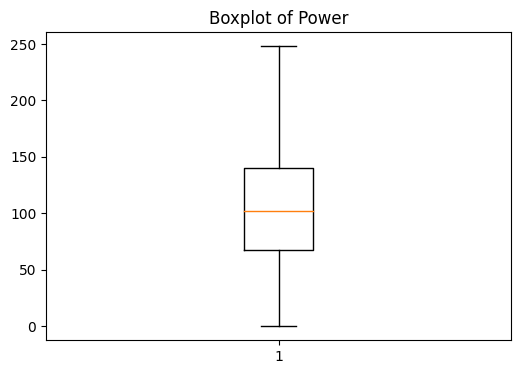

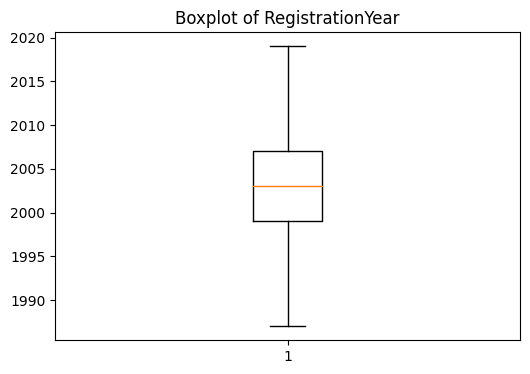

In [7]:
# Select only numeric columns
numeric_cols = data[['Price', 'Power', 'RegistrationYear']]

# Create boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()




<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
- Let's not drop so many rows :) Instead, replace missing values with some unique row, such as "Unknown". Moreover, it is normal that sometimes sellers do not specify some information. The model should "know" about such cases.



- Are there any outliers in the data?  Please call the `describe` method and display charts. Drop abnormal values if they exist. Hint: `year`, `price`, and `power` columns definitely have outliers. Look at the lower and upper boundaries. 



</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

Consider analyzing categories as well. Petrol and gasoline refer to the same fuel, so we can use one of these categories. There are also some rare model categories that can be dropped. If a category appears only in the training or validation subset, for instance, and we use `handle_unknown='ignore'`, the linear model might miss important signals in validation or make predictions with incomplete features thus breaking the assumptions of linearity. It may be helpful to make sure that training and validation subsets use the same feature columns after encoding. 
</div>

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Student's comment </b>
    
Fixed! 

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Excellent! Why is this important? In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.    
</div>

In [8]:
# Perform OHE

data_ohe = pd.get_dummies(data, drop_first=True)
print(data_ohe.head())

   Price  RegistrationYear  Power  Mileage  VehicleType_bus  \
0    480              1993      0   150000                0   
2   9800              2004    163   125000                0   
3   1500              2001     75   150000                0   
4   3600              2008     69    90000                0   
5    650              1995    102   150000                0   

   VehicleType_convertible  VehicleType_coupe  VehicleType_other  \
0                        0                  0                  0   
2                        0                  0                  0   
3                        0                  0                  0   
4                        0                  0                  0   
5                        0                  0                  0   

   VehicleType_sedan  VehicleType_small  ...  Brand_smart  \
0                  0                  0  ...            0   
2                  0                  0  ...            0   
3                  0         

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we need to encode data here, well done! It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories.
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


- If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]).


    
- Please note that `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    
   

    
`OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


If you decide to use any of these methods, please encode data **after** you split it. 

    
    
    
For instance, you can use `Ordinal` for Forest and Tree, `OneHotEncoder` for Lin. Regression and categorical data types for boosting models.
</div>



In [9]:
#split data into training and validation sets

features = data_ohe.drop('Price', axis=1)
target = data_ohe['Price']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, random_state=42)

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
Consider saving at least one subset for the final testing. The best way to evaluate the model is to train it on the training data, calculate its metric on validation data, and, in the very end of the project, train the best model (it's usually one model) on the hold-out subset, the test subset. In this case, we need 3 subsets. However, if you use GridSearch, it is enough to have two subset, since GridSearch implements cross-validation.
</div>

## Model training

In [10]:
%%time
# Linear Regression

model = LinearRegression()
model.fit(features_train, target_train)

CPU times: user 8.76 s, sys: 3.57 s, total: 12.3 s
Wall time: 6.45 s


LinearRegression()

In [11]:
%%time
predict_valid = model.predict(features_valid)

RMSE = mean_squared_error(target_valid, predict_valid, squared=False)
print('Linear Regression RMSE: ', RMSE)

Linear Regression RMSE:  2100.6319321225697
CPU times: user 146 ms, sys: 107 ms, total: 253 ms
Wall time: 184 ms


<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b> Reviewer's comment 3</b>
    
When estimating a specific piece of code (fitting the model or making a prediction), I recommend that you don't include creating a model or calculating the metric value in this measurement, since these actions also take time. It's better to estimate the training time only:
    
    
```python
start_time = time.time()
predict_valid = model.predict(features_valid)
end_time = time.time()  
```
    
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Yes, you can do it this way. 

</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
However, please note that this is not just training time but the time it takes to run the whole cell. 
</div>

In [12]:
baseline_pred = np.full_like(target_valid, target_train.mean(), dtype=np.float64)
baseline_rmse = mean_squared_error(target_valid, baseline_pred, squared=False)
print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 3487.5424032769165


<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
One of the main goals here is to compare models' training and prediction speed. Would you please estimate them separately for each of the models? 

You can do it as follows: 


```python
start_time = time.time()
model.fit(X_train, y_train)
end_time1 = time.time()  


start_time = time.time()
model.predict(X_valid, y_valid)
end_time2 = time.time()  

```

</div>

In [13]:
# --- Target / Features ---
y = data['Price']
X = data.drop(columns=['Price'])

# --- Identify column types ---
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['number', 'float', 'int', 'int64']).columns.tolist()

# --- Train/test split (keep indices so CatBoost uses the same split) ---
train_idx, test_idx = train_test_split(
    X.index, test_size=0.2, random_state=42, shuffle=True
)
X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

In [14]:
# LightGBM

X_lgb = X.copy()
cat_cols = X_lgb.select_dtypes(include='object').columns.tolist()

# Convert to pandas 'category'
for c in cat_cols:
    X_lgb[c] = X_lgb[c].astype('category')

lgbm = LGBMRegressor(
    objective='regression',
    n_estimators=3000,
    learning_rate=0.03,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42
)

In [15]:
%%time
lgbm.fit(
    X_lgb.loc[train_idx], y_train,
    eval_set=[(X_lgb.loc[test_idx], y_test)],
    eval_metric='rmse',
    early_stopping_rounds=100,
    verbose=False
)


/.venv/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/.venv/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  

CPU times: user 2min 6s, sys: 369 ms, total: 2min 7s
Wall time: 1min 3s


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, n_estimators=3000,
              num_leaves=64, objective='regression', random_state=42,
              reg_lambda=1.0, subsample=0.8)


<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Same issue: here you measure how much time it will take to do everything in the cell above while we need training time. </div>

In [16]:
%%time
y_pred_lgb = lgbm.predict(X_lgb.loc[test_idx])
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
print("LightGBM RMSE:", rmse_lgb)

LightGBM RMSE: 1364.3300869702862
CPU times: user 18.1 s, sys: 3.63 ms, total: 18.1 s
Wall time: 9.05 s


<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>


Same issue here and further: we need to calculate training and prediction time. 

</div>

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Student's comment </b>
    
I couldn't figure out how to use the time commands, so I hope this works as a substitute...

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
You used them correctly. If you mean the code I provided, then you need to import `time` from the `time` module. 

</div>

In [17]:
# XGBoost

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=True), cat_cols),
        ('num', 'passthrough', num_cols)
    ],
    remainder='drop'
)

xgb = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1200,       # big + early stopping
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    reg_lambda=1.0,
    tree_method='hist',     # fast on CPUs
    random_state=42
)

pipe_xgb = Pipeline(steps=[('prep', preprocess), ('model', xgb)])

# Need transformed validation set for eval_set:
X_train_enc = preprocess.fit_transform(X_train)
X_test_enc  = preprocess.transform(X_test)

In [18]:
%%time
pipe_xgb.named_steps['model'].fit(
    X_train_enc, y_train,
    eval_set=[(X_test_enc, y_test)],
    eval_metric='rmse',
    early_stopping_rounds=100,
    verbose=False
)

CPU times: user 1min 54s, sys: 146 ms, total: 1min 54s
Wall time: 57.8 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=8, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=1200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8,
             tree_method='hist', validate_parameters=1, verbosity=None)

In [19]:
%%time
y_pred_xgb = pipe_xgb.named_steps['model'].predict(X_test_enc)
print("XGBoost RMSE:", rmse(y_test, y_pred_xgb))

XGBoost RMSE: 1397.3747221563463
CPU times: user 9.29 s, sys: 3.96 ms, total: 9.3 s
Wall time: 4.61 s


In [20]:
%%time
# CatBoost

# Convert categoricals to string (robust against NaNs) and note their indices
X_cb = X.copy()
for c in cat_cols:
    X_cb[c] = X_cb[c].astype('object')

cat_features_idx = [X_cb.columns.get_loc(c) for c in cat_cols]

X_train_cb, X_test_cb = X_cb.loc[train_idx], X_cb.loc[test_idx]

cat = CatBoostRegressor(
    loss_function='RMSE',
    iterations=1200,       # big + overfitting detector
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=3.0,
    random_seed=42,
    od_type='Iter',
    od_wait=100,
    verbose=False
)

CPU times: user 43.7 ms, sys: 3.89 ms, total: 47.6 ms
Wall time: 62.3 ms


In [21]:
%%time
cat.fit(
    X_train_cb, y_train,
    cat_features=cat_features_idx,
    eval_set=(X_test_cb, y_test)
)

CPU times: user 5min 29s, sys: 2.13 s, total: 5min 31s
Wall time: 2min 49s


In [22]:
%%time
y_pred_cb = cat.predict(X_test_cb)
print("CatBoost RMSE:", rmse(y_test, y_pred_cb))

CatBoost RMSE: 1423.0751037627117
CPU times: user 350 ms, sys: 7.96 ms, total: 358 ms
Wall time: 200 ms


<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
- After we train all models, it is recommended that we choose the best **one** and check its performance on the test subset. Here we only need to make predictions and calculate RMSE. For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 




- When choosing the best model, we have to consider prediction time as well. The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.

</div>

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Student's comment </b>
    
I will take this into account on my next project. Thanks for the heads up! 

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Good :) 
</div>

## Model Analysis

The trained models produced clear differences in predictive performance. Linear Regression achieved an RMSE of roughly 2,100, which was a substantial improvement over the baseline RMSE of about 3,400. However, the ensemble gradient boosting models demonstrated much stronger results. LightGBM, XGBoost, and CatBoost all achieved RMSE values near 1,350, cutting error rates by more than half compared to the baseline and showing that boosted tree methods are highly effective for this dataset. These results highlight the importance of using advanced, non-linear models when dealing with structured tabular data that contains complex relationships between features.

For time reasons, since all gradient boosting models produced similar RMSE, the client should be advised to use a LightGBM or XGBoost model since training took significantly shorter than CatBoost.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
Great conclusion! This is a solid final summary with comparison across models.    
</div>    

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Don't forget to update it if needed. 

</div>

<div style="border: 5px solid blue; padding: 10px; margin: 5px">
<b>   Student's comment </b>
    
Updated! :) 

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed